In [17]:
import pandas as pd
import datetime as dt

In [18]:
base = pd.read_csv('netflix daily top 10.csv')

## Visualizar a base de dados importada

In [19]:
# Visualizar os primeiros dados da tabela
base.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [20]:
# Visualizar os ultimos dados da tabela
base.tail()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33
7099,2022-03-11,10,10,-,Shrek,Movie,NaN,"May 1, 2018",7,12


### Visualizar tamanho da base

In [21]:
base.shape # Resultado => 7100 linhas e 10 colunas

(7100, 10)

### Visualizar o tipo de informação da base

In [22]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


### Verificar valores nulos

In [23]:
base.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [24]:
# Como o resultado acima mostrou que existem valores nulos em Netflix exclusive e os dados preenchido estao
# como SIM, pode-se assumir que os valores nulos são aqueles filmes não exclusivos

base['Netflix Exclusive'] = base['Netflix Exclusive'].fillna("No")

In [25]:
# Validar se os dados foram substituidos
display(base)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,No,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,No,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,No,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,No,"Mar 1, 2022",10,33


In [26]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     7100 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


## Verificar período da base de dados

In [27]:
# transformar a coluna 'As of' em uma coluna do tipo datetime
base['As of'] = pd.to_datetime(base['As of'])
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   object        
 3   Last Week Rank        7100 non-null   object        
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     7100 non-null   object        
 7   Netflix Release Date  7100 non-null   object        
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 554.8+ KB


In [28]:
base['As of'].agg(['min', 'max'])

min   2020-04-01
max   2022-03-11
Name: As of, dtype: datetime64[ns]

In [29]:
base.describe()

,As of,Rank,Days In Top 10,Viewership Score
count,7100,7100.000000,7100.000000,7100.000000
mean,2021-03-21 12:00:00.000000256,5.500000,24.123662,122.790141
min,2020-04-01 00:00:00,1.000000,1.000000,1.000000
25%,2020-09-25 00:00:00,3.000000,3.000000,19.000000
50%,2021-03-21 12:00:00,5.500000,7.000000,50.000000
75%,2021-09-15 00:00:00,8.000000,18.000000,128.000000
max,2022-03-11 00:00:00,10.000000,428.000000,1474.000000
std,NaN,2.872484,58.473789,213.861642


Rank                   Axes(0.125,0.11;0.227941x0.77)
Days In Top 10      Axes(0.398529,0.11;0.227941x0.77)
Viewership Score    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

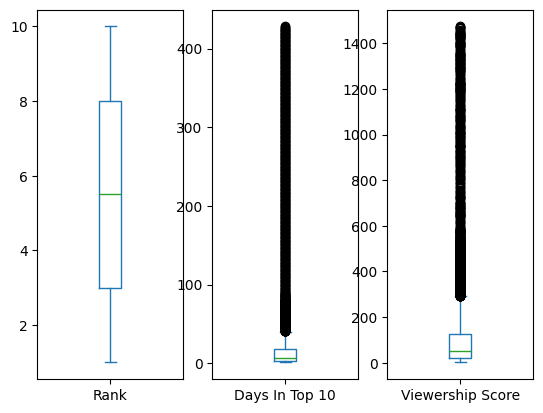

In [31]:
base.plot.box(subplots=True)

In [36]:
q1_DaysInTop10 = base['Days In Top 10'].quantile(0.25)
q3_DaysInTop10 = base['Days In Top 10'].quantile(0.75)

iqr_DaysInTop10 = q3_DaysInTop10 - q1_DaysInTop10
iqr_DaysInTop10

np.float64(15.0)

In [37]:
lmtInf_DaysInTop10 = q1_DaysInTop10 - (iqr_DaysInTop10 * 1.5)
lmtSup_DaysInTop10 = q3_DaysInTop10 + (iqr_DaysInTop10 * 1.5)

lmtInf_DaysInTop10, lmtSup_DaysInTop10

(np.float64(-19.5), np.float64(40.5))

In [47]:
outliers = base[(base['Days In Top 10'] < lmtInf_DaysInTop10) | (base['Days In Top 10'] > lmtSup_DaysInTop10)]
outliers

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
438,2020-05-14,9,9,-,Ozark,TV Show,Yes,"Jul 21, 2017",41,256
447,2020-05-15,8,9,10,Ozark,TV Show,Yes,"Jul 21, 2017",42,259
458,2020-05-16,9,8,-,Ozark,TV Show,Yes,"Jul 21, 2017",43,261
489,2020-05-19,10,-,7,Ozark,TV Show,Yes,"Jul 21, 2017",44,262
629,2020-06-02,10,-,-,Outer Banks,TV Show,Yes,"Apr 15, 2020",41,291
...,...,...,...,...,...,...,...,...,...,...
7053,2022-03-07,4,3,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",42,288
7063,2022-03-08,4,4,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",43,295
7074,2022-03-09,5,4,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",44,301
7085,2022-03-10,6,5,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",45,306


In [48]:
outliers.Title.value_counts()

Title
Cocomelon               388
Ozark                    49
Cobra Kai                41
Manifest                 40
The Queenâs Gambit     33
Outer Banks              32
Squid Game               26
All American             26
Bridgerton               18
Lucifer                  17
Virgin River             15
Maid                      9
Emily in Paris            8
Too Hot to Handle         7
Love is Blind             6
The Witcher               5
Sweet Magnolias           5
Ginny & Georgia           4
Tiger King                4
The Queen of Flow         4
Who Killed Sara?          2
Shameless                 2
iCarly                    2
Name: count, dtype: int64

<Axes: xlabel='Type'>

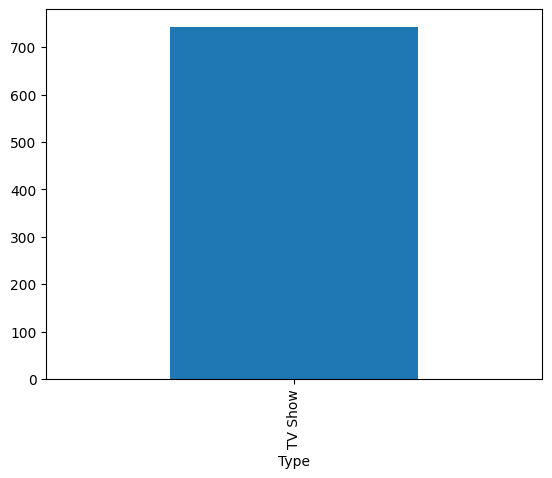

In [49]:
# Demonstrar quais tipos de show são outliers
outliers['Type'].value_counts().plot.bar()